<a href="https://colab.research.google.com/github/hankong0222/Deep-Learning-practice-projects/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10
Each image belongs to one of the following 10 categories:
| Label | Class      |
| ----- | ---------- |
| 0     | airplane   |
| 1     | automobile |
| 2     | bird       |
| 3     | cat        |
| 4     | deer       |
| 5     | dog        |
| 6     | frog       |
| 7     | horse      |
| 8     | ship       |
| 9     | truck      |


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
import matplotlib.pyplot as plt

In [6]:
print("Type:", type(x_train[0]))
print("Shape:", x_train[0].shape)
print("Dtype:", x_train[0].dtype)
print("Min/Max:", x_train[0].min(), "/", x_train[0].max())


Type: <class 'numpy.ndarray'>
Shape: (32, 32, 3)
Dtype: uint8
Min/Max: 0 / 255


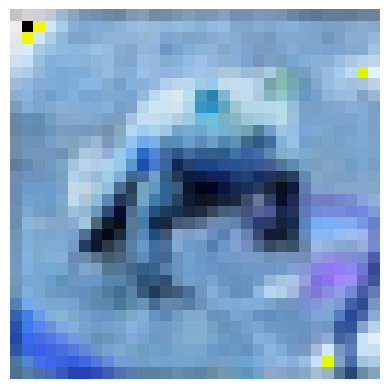

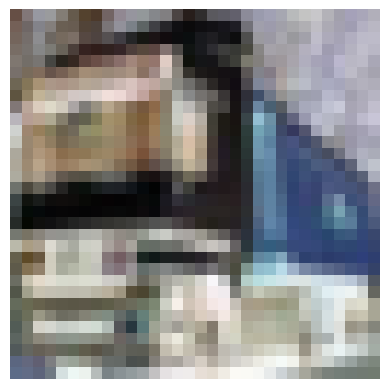

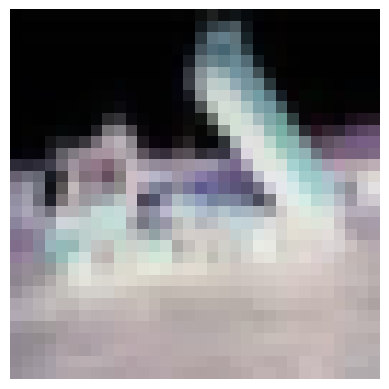

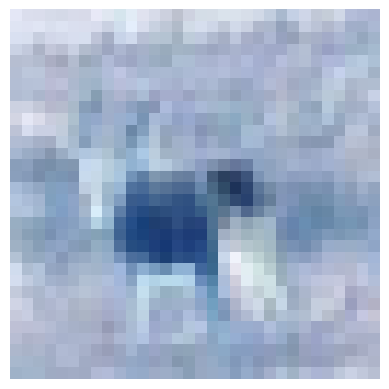

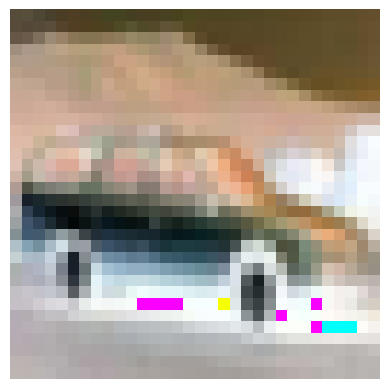

In [7]:
for i in range(5):
    img = (x_train[i] * 255).astype("uint8")  # rescale for visualization
    plt.imshow(img)
    plt.axis("off")
    plt.show()

## Data Augmentation
Data Augmentation means generating new training samples by applying random transformations to the original images. This includes:

· Random horizontal flipping

· Random rotation

· Shifting, zooming, cropping

· Brightness/contrast changes

· And more...

It increases data diversity without collecting new data.v

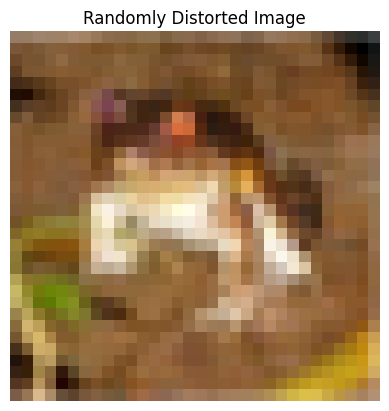

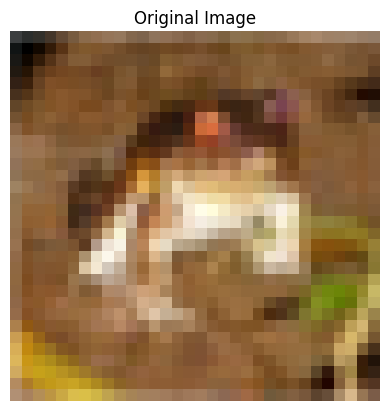

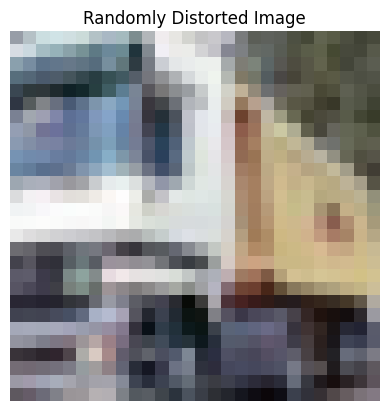

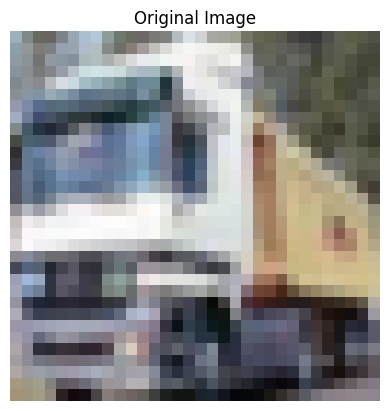

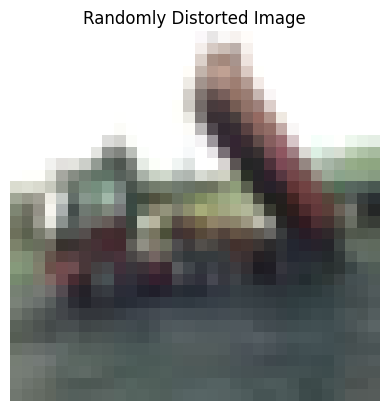

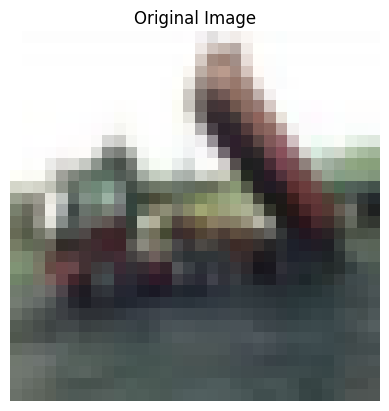

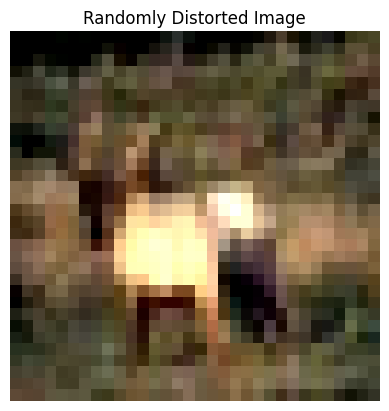

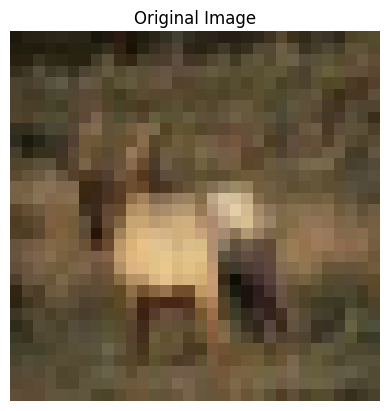

In [9]:
image_tensor1 = tf.convert_to_tensor(x_train[0], dtype=tf.float32)
image_tensor2 = tf.convert_to_tensor(x_train[1], dtype=tf.float32)
image_tensor3 = tf.convert_to_tensor(x_train[2], dtype=tf.float32)
image_tensor4 = tf.convert_to_tensor(x_train[3], dtype=tf.float32)

distorted = []
# Apply augmentation
flipped = tf.image.random_flip_left_right(image_tensor1)
cropped = tf.image.random_crop(image_tensor2, [28,28,3])
brighted = tf.image.random_brightness(image_tensor3, max_delta=63)
contrasted = tf.image.random_contrast(image_tensor4, lower=0.2, upper=1.8)

distorted.append(flipped)
distorted.append(cropped)
distorted.append(brighted)
distorted.append(contrasted)

for i in range(4):
    img_display = distorted[i]
    # Convert back to NumPy for display
    img_display = tf.cast(img_display, tf.uint8).numpy()

    # Show image
    plt.imshow(img_display)
    plt.axis("off")
    plt.title("Randomly Distorted Image")
    plt.show()

    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title("Original Image")
    plt.show()


In [10]:
# can do the change simultaneously
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,       # rotate up to 15 degrees
    width_shift_range=0.1,   # shift width by 10%
    height_shift_range=0.1,  # shift height by 10%
    horizontal_flip=True,    # random horizontal flip
    zoom_range=0.1           # slight zoom
)


## Recongize Model

In [11]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

In [12]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class vectors to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
# Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
tf.keras.backend.clear_session()


In [17]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,  #smaller batch size
                    validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 59s 84ms/step - accuracy: 0.9696 - loss: 0.0940 - val_accuracy: 0.7214 - val_loss: 1.4919
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.9893 - loss: 0.0405 - val_accuracy: 0.7124 - val_loss: 1.6644
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 88s 94ms/step - accuracy: 0.9832 - loss: 0.0541 - val_accuracy: 0.7056 - val_loss: 1.8270
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.9781 - loss: 0.0640 - val_accuracy: 0.7134 - val_loss: 1.8613
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.9803 - loss: 0.0574 - val_accuracy: 0.6990 - val_loss: 1.9822
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 60s 85ms/step - accuracy: 0.9819 - loss: 0.0533 - val_accuracy: 0.7116 - val_loss: 2.0469
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 85s 90ms/step - accuracy: 0.9834 - loss: 0.0491 - val_accuracy: 0.6988 - val_loss: 2.0777
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.9831 - loss: 0.0520 - 

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.6817 - loss: 2.4517
Test Accuracy: 0.6817


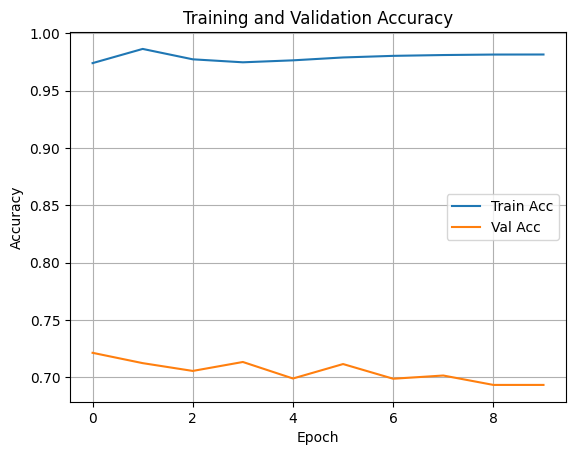

In [19]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.title("Training and Validation Accuracy")
plt.show()
